<b>Importing the dataset and EDA with Data visualization </b>

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
inform = pd.read_csv('Information.csv', engine='python')
inform

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [248]:
inform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

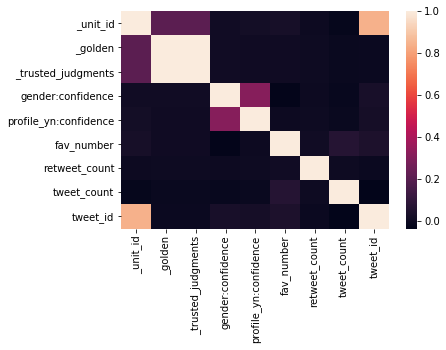

In [249]:
sns.heatmap(inform.corr())

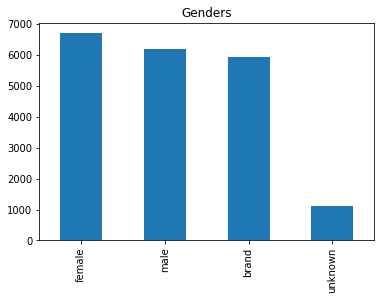

In [250]:
inform['gender'].value_counts().plot.bar(title='Genders')

<b>Feature Selection required to predict Gender</b>

In [251]:
inform=inform[['gender','gender:confidence','description','text']]   

<b>Cleaning the dataset</b>

In [252]:
inform.isnull().sum()    #checking number of null values

gender                 97
gender:confidence      26
description          3744
text                    0
dtype: int64

In [253]:
def normalize_text(s):   #removing punctuation and checking double spaces if generated 
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    s = re.sub('\s+',' ',s)
    return s

inform['text_norm'] = [normalize_text(s) for s in inform['text']]     #column text after cleaning is stored in text_norm
inform['description_norm'] = [normalize_text(s) for s in inform['description']]   #column description after cleaning is stored in description_norm

C:\Users\Sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [255]:
inform['text_norm'].head()

0    robbie e responds to critics after win against...
1    ‰ûïit felt like they were my friends and i was...
2    i absolutely adore when louis starts the songs...
3    hi jordanspieth looking at the url do you use ...
4    watching neighbours on sky catching up with th...
Name: text_norm, dtype: object

In [256]:
inform=inform.rename(columns={'gender:confidence': 'confidence'})   #renaming gender:confidence to confidence

In [257]:
inform=inform[(inform.confidence==1) & ((inform.gender=='male') | (inform.gender=='female'))]   #selecting the dataset with gender confidence 1 and a given gender thus performing feature engineering

In [259]:
inform.isnull().sum()             #checking null values after performing feature engineering

gender                 0
confidence             0
description         1254
text                   0
text_norm              0
description_norm       0
dtype: int64

In [260]:
inform.dropna(subset = ["description"], inplace=True)    #removing nan values from column description

In [261]:
inform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 20049
Data columns (total 6 columns):
gender              8766 non-null object
confidence          8766 non-null float64
description         8766 non-null object
text                8766 non-null object
text_norm           8766 non-null object
description_norm    8766 non-null object
dtypes: float64(1), object(5)
memory usage: 479.4+ KB


In [262]:
inform.isnull().sum()

gender              0
confidence          0
description         0
text                0
text_norm           0
description_norm    0
dtype: int64

<b>Questions asked on the dataset:-</b>

<b>What are the most common emotions/words used by Males and Females?</b>

In [263]:
from collections import Counter
import string
import nltk
nltk.download('stopwords')

common_female=inform[inform.gender=='female']['text'].str.lower()
common_male=inform[inform.gender=='male']['text'].str.lower()
common_all=inform[(inform.gender=='male')|(inform.gender=='female')]['text'].str.lower()

common_female=common_female.values.tolist()
common_male=common_male.values.tolist()
common_all=common_all.values.tolist()

common_female_break=[nltk.tokenize.wordpunct_tokenize(text) for text in common_female]
common_male_break=[nltk.tokenize.wordpunct_tokenize(text) for text in common_male]
common_all_break=[nltk.tokenize.wordpunct_tokenize(text) for text in common_all]


stopwords = nltk.corpus.stopwords.words('english')

from itertools import groupby

def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

common_female_break= clear_multiple_char(common_female_break)
common_male_break= clear_multiple_char(common_male_break)
common_all_break= clear_multiple_char(common_all_break)


from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
punctuation = string.punctuation 
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

common_female_clear= comment_raiz(common_female_break)
common_male_clear= comment_raiz(common_male_break)
common_all_clear= comment_raiz(common_all_break)

def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

common_female_cnt = counter(common_female_clear)
common_male_cnt = counter(common_male_clear)
common_all_cnt = counter(common_all_clear)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<b>Most common words used by Female</b>

In [264]:
common_female_cnt.most_common(10)

[('https', 1375),
 ('get', 337),
 ('lik', 328),
 ('lov', 274),
 ('ù', 274),
 ('day', 262),
 ('on', 259),
 ('tim', 211),
 ('ev', 208),
 ('peopl', 181)]

<b>Most common words used by Male</b>

In [265]:
common_male_cnt.most_common(10)

[('https', 1336),
 ('get', 304),
 ('lik', 279),
 ('on', 200),
 ('tim', 187),
 ('new', 177),
 ('mak', 161),
 ('lov', 158),
 ('real', 155),
 ('see', 138)]

<b>Most common words used by both Male and Female</b>

In [266]:
common_all_cnt.most_common(10)

[('https', 2711),
 ('get', 641),
 ('lik', 607),
 ('on', 459),
 ('lov', 432),
 ('day', 400),
 ('tim', 398),
 ('mak', 341),
 ('ev', 335),
 ('new', 331)]

<b>Which gender makes more typos in their tweets?</b>

In [267]:
from nltk.corpus import words as nltk_words
stopwords = nltk.corpus.stopwords.words('english')

common_female=inform[inform.gender=='female']['text'].str.lower()
common_male=inform[inform.gender=='male']['text'].str.lower()

def counttypo(comment):
    c=0
    for word in comment:
        if word not in stopwords:
            c=c+1
    return c

common_female_typo= counttypo(common_female)
common_male_typo=counttypo(common_male)


print("Number of Female typo errors=",common_female_typo)
print("Number of Male typo errors=",common_male_typo)

Number of Female typo errors= 4616
Number of Male typo errors= 4150


<b> Naive Bayes Model</b>

In [274]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

inform['all_text'] = inform['text_norm'].str.cat(inform['description_norm'], sep=' ')
vectorizer = CountVectorizer()

x = vectorizer.fit_transform(inform['all_text'])

encoder = LabelEncoder()
y = encoder.fit_transform(inform['gender'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nb = MultinomialNB()
nb.fit(x_train, y_train)
predict=nb.predict(x_test)
accuracy_score(y_test,predict)

0.7132269099201825

<b>SVM Model</b>

In [240]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = vectorizer.fit_transform(inform['all_text'])

encoder = LabelEncoder()
y = encoder.fit_transform(inform['gender'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

svclassifier=SVC(kernel='linear')
svclassifier.fit(x_train,y_train)

y_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6670467502850627


<b>Random Forest</b>

In [241]:
from sklearn.ensemble import RandomForestClassifier
x = vectorizer.fit_transform(inform['all_text'])

encoder = LabelEncoder()
y = encoder.fit_transform(inform['gender'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6334093500570125